## Import Data and Demonstrate

In [1]:
import pandas as pd
!pip install wordcloud

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
path = r"C:\Users\shane\Desktop\MSBA\BT4012_Kaggle\bt-4012-in-class-kaggle-competition-2024-nov\train.csv"
df = pd.read_csv(path)
df.head()

,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,target
0,2012-01-15 23:40:09,True,False,Cosplayer/Fitness lover. Come to me https://t....,74,7,0,False,465096524,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9666745212...,reml5477,20,False,0.006,3138,1
1,2016-10-04 00:44:39,False,False,pobody’s nerfect,50443,164,590,True,783105517673648132,cy,she/her,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1281752126...,kinlibra,6469,False,4.572,1415,0
2,2009-05-23 04:04:13,False,False,gracias por participar 🏅,9394,208,189,False,41970759,es,La diaspora,http://abs.twimg.com/images/themes/theme17/bg.gif,http://pbs.twimg.com/profile_images/1233811596...,_delaualau,30296,False,7.378,4106,0
3,2009-05-17 04:31:31,False,False,Stand Up Comedian/Actor from North Philadelphi...,46,66180,1090,True,40607946,en,"Calabasas, CA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1184851104...,SpankHorton,164957,False,40.116,4112,0
4,2009-02-16 13:11:21,True,False,Assignment Editor at NBC10 and President of Ja...,1223,487,867,True,20983433,en,"Jenkintown, PA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/5234863934...,javelinjt,1752,False,0.417,4201,0


In [4]:
print(df.info())  # Gives an overview of column types and missing values
print(df.describe())  # Shows statistical summaries for numerical columns
print(df.describe(include='object'))  # Shows summaries for categorical columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26206 entries, 0 to 26205
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   created_at                    26206 non-null  object 
 1   default_profile               26206 non-null  bool   
 2   default_profile_image         26206 non-null  bool   
 3   description                   21115 non-null  object 
 4   favourites_count              26206 non-null  int64  
 5   followers_count               26206 non-null  int64  
 6   friends_count                 26206 non-null  int64  
 7   geo_enabled                   26206 non-null  bool   
 8   id                            26206 non-null  int64  
 9   lang                          20618 non-null  object 
 10  location                      26204 non-null  object 
 11  profile_background_image_url  22971 non-null  object 
 12  profile_image_url             26205 non-null  object 
 13  s

,favourites_count,followers_count,friends_count,id,statuses_count,average_tweets_per_day,account_age_days,target
count,26206.000000,2.620600e+04,2.620600e+04,2.620600e+04,2.620600e+04,26206.000000,26206.000000,26206.000000
mean,12159.971342,3.732983e+05,4.427275e+03,1.253306e+17,2.072485e+04,6.754636,3017.870831,0.335152
std,33628.948536,2.515996e+06,4.602204e+04,3.035728e+17,6.345569e+04,22.782745,1018.958572,0.472053
min,0.000000,0.000000e+00,0.000000e+00,5.860000e+02,0.000000e+00,0.000000,483.000000,0.000000
25%,347.000000,3.400000e+01,3.400000e+01,9.799366e+07,1.331000e+03,0.486250,2302.000000,0.000000
50%,2037.000000,3.540000e+02,2.920000e+02,3.997210e+08,4.143500e+03,1.464000,3218.000000,0.000000
75%,8751.750000,8.241500e+03,8.780000e+02,2.480241e+09,1.679150e+04,5.460000,3895.000000,1.000000
max,839929.000000,1.216415e+08,1.641962e+06,1.120974e+18,2.771910e+06,1191.286000,5151.000000,1.000000


### Checking the Null Values

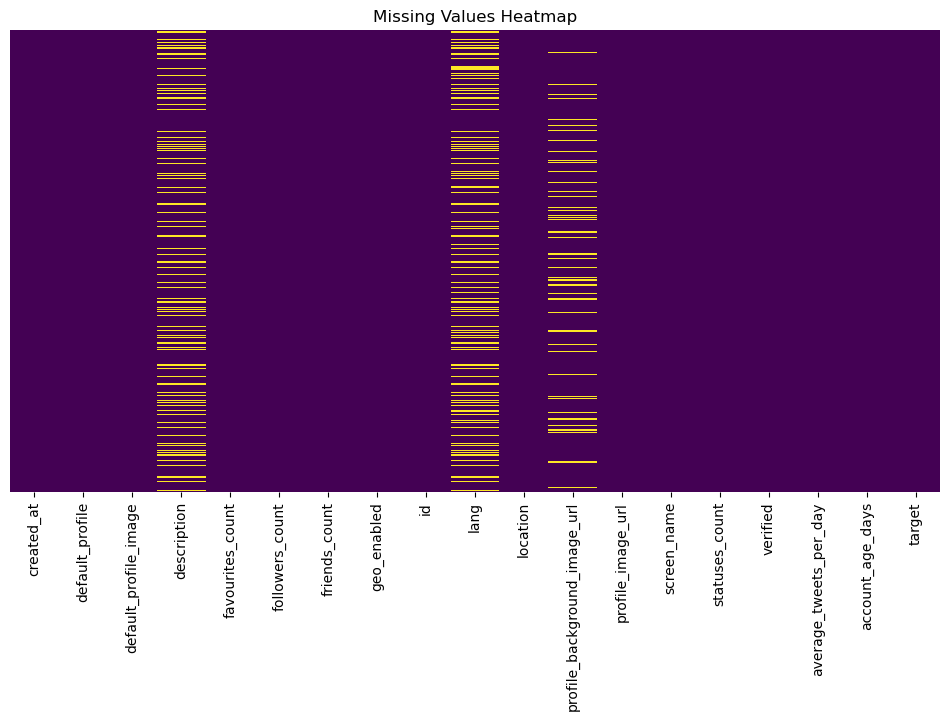

In [5]:
# # Plotting the missing values heatmap
# plt.figure(figsize=(12, 6))
# sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
# plt.title("Missing Values Heatmap")
# plt.show()


In [6]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display columns with missing values only
missing_values = missing_values[missing_values > 0]
print(missing_values)

description                     5091
lang                            5588
location                           2
profile_background_image_url    3235
profile_image_url                  1
dtype: int64


From the map and description we see missing values exits in _description_, _lang_, and _profile_background_image_url_. The null values in these fields make sense, since it's users' decisions to setup or not. It might be helpful to transform those field values into "have value" and "Unknown" in the feature engineering.
The rest of the field let's just impute the null with "Unknown", since there's only a few missing value. 

In [7]:
# Fill missing values in description, lang, and location with "Unknown" or a placeholder
df['description'].fillna("Unknown", inplace=True)
df['location'].fillna("Unknown", inplace=True)
df['lang'].fillna("Unknown", inplace=True)
df['profile_background_image_url'].fillna("Unknown", inplace=True)
df['profile_image_url'].fillna("Unknown", inplace=True)



### Univairant Analysis

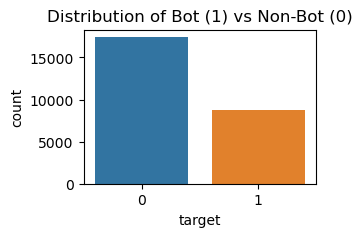

In [8]:
# Plot the distribution of the target column
plt.figure(figsize=(3, 2))
sns.countplot(x='target', data=df)
plt.title("Distribution of Bot (1) vs Non-Bot (0)")
plt.show()


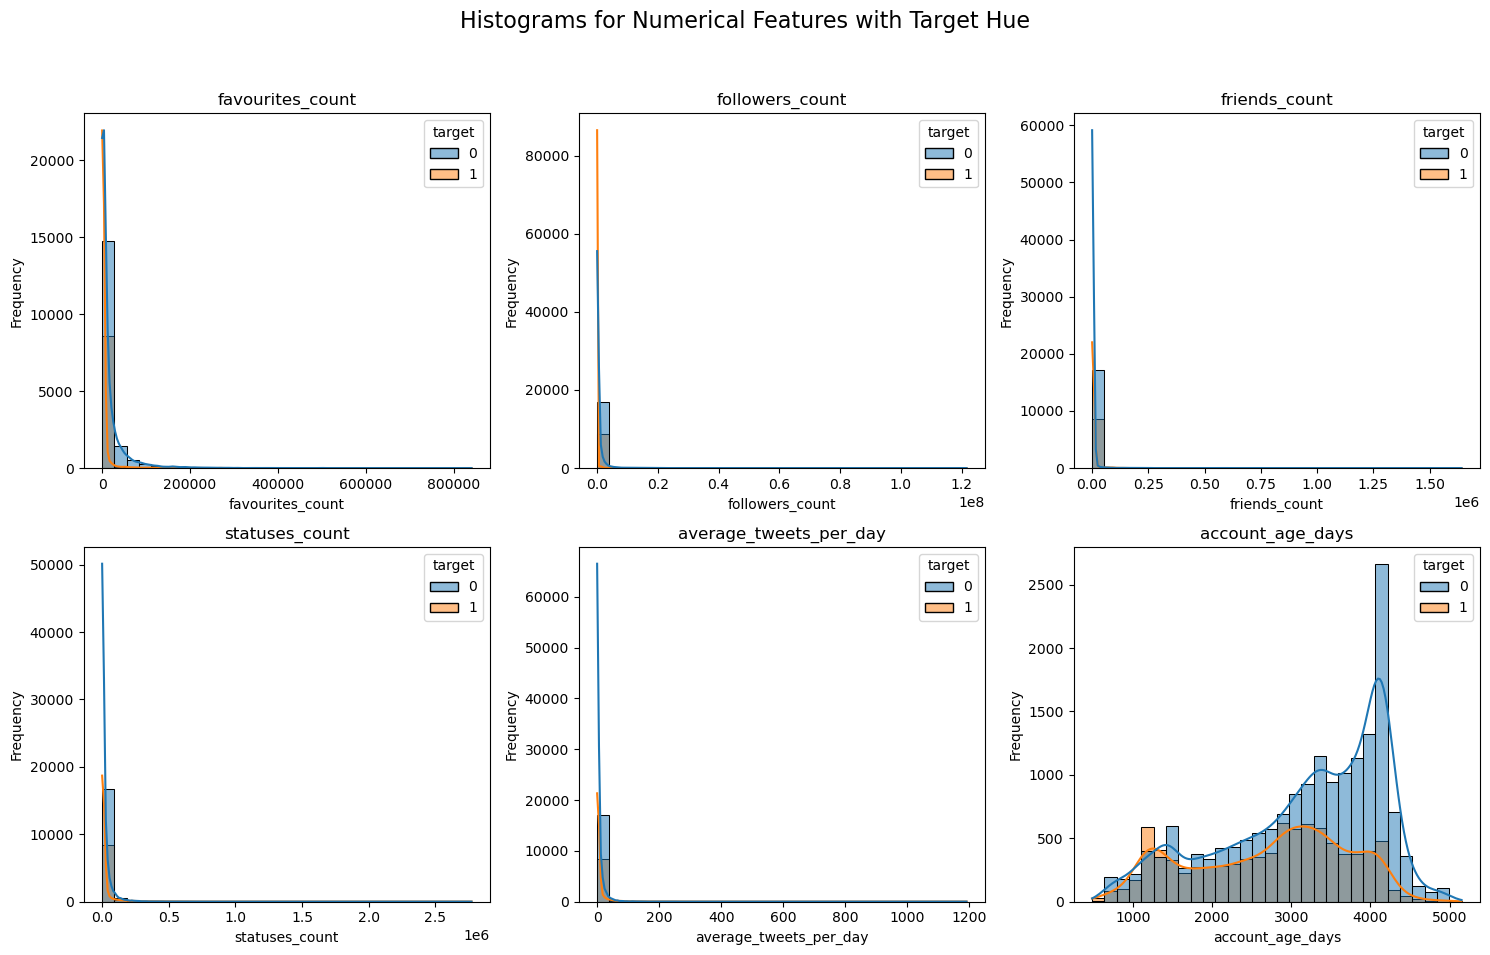

In [9]:
# # List of numerical columns to plot
# numerical_columns = ['favourites_count', 'followers_count', 'friends_count', 'statuses_count', 'average_tweets_per_day', 'account_age_days']

# # Set up the subplots - one for each feature
# fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
# fig.suptitle("Histograms for Numerical Features with Target Hue", fontsize=16)

# # Flatten the axes array for easy iteration
# axes = axes.flatten()

# # Loop through each feature and create a histogram with hue in its own subplot
# for i, column in enumerate(numerical_columns):
#     sns.histplot(data=df, x=column, hue='target', bins=30, ax=axes[i], kde=True)
#     axes[i].set_title(f"{column}")
#     axes[i].set_xlabel(column)
#     axes[i].set_ylabel("Frequency")

# # Adjust layout for better spacing between subplots
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.show()

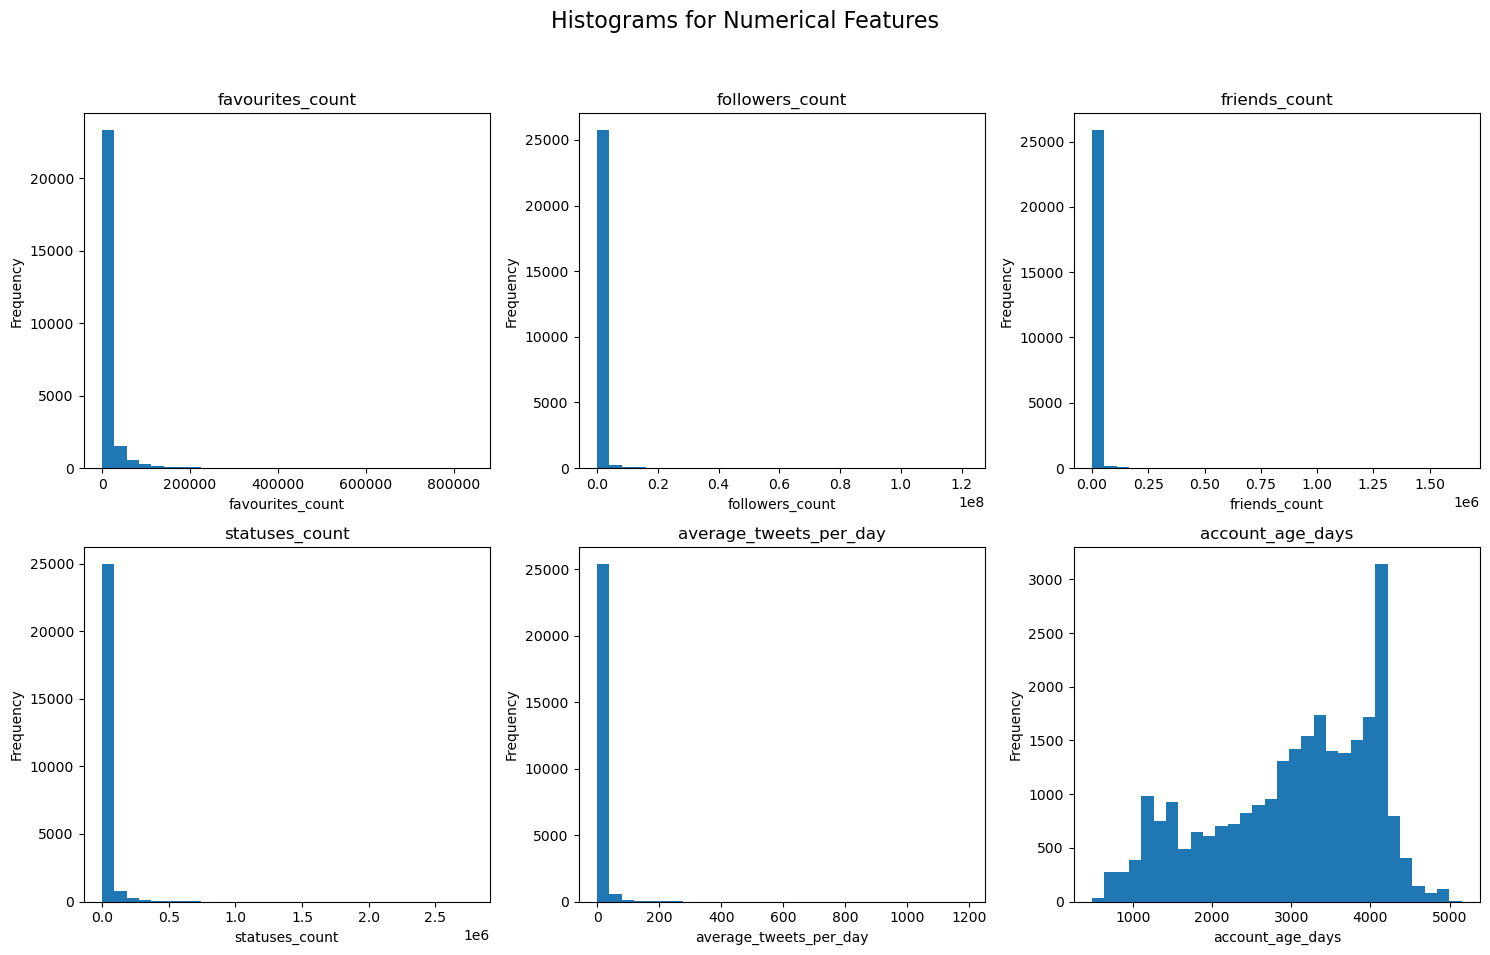

In [10]:
# import matplotlib.pyplot as plt

# # List of numerical columns to plot
# numerical_columns = ['favourites_count', 'followers_count', 'friends_count', 'statuses_count', 'average_tweets_per_day', 'account_age_days']

# # Set up the subplots - one for each feature
# fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
# fig.suptitle("Histograms for Numerical Features", fontsize=16)

# # Flatten the axes array for easy iteration
# axes = axes.flatten()

# # Loop through each feature and create a histogram in its own subplot
# for i, column in enumerate(numerical_columns):
#     axes[i].hist(df[column].dropna(), bins=30)  # Dropping NaNs if any
#     axes[i].set_title(f"{column}")
#     axes[i].set_xlabel(column)
#     axes[i].set_ylabel("Frequency")

# # Adjust layout for better spacing between subplots
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.show()


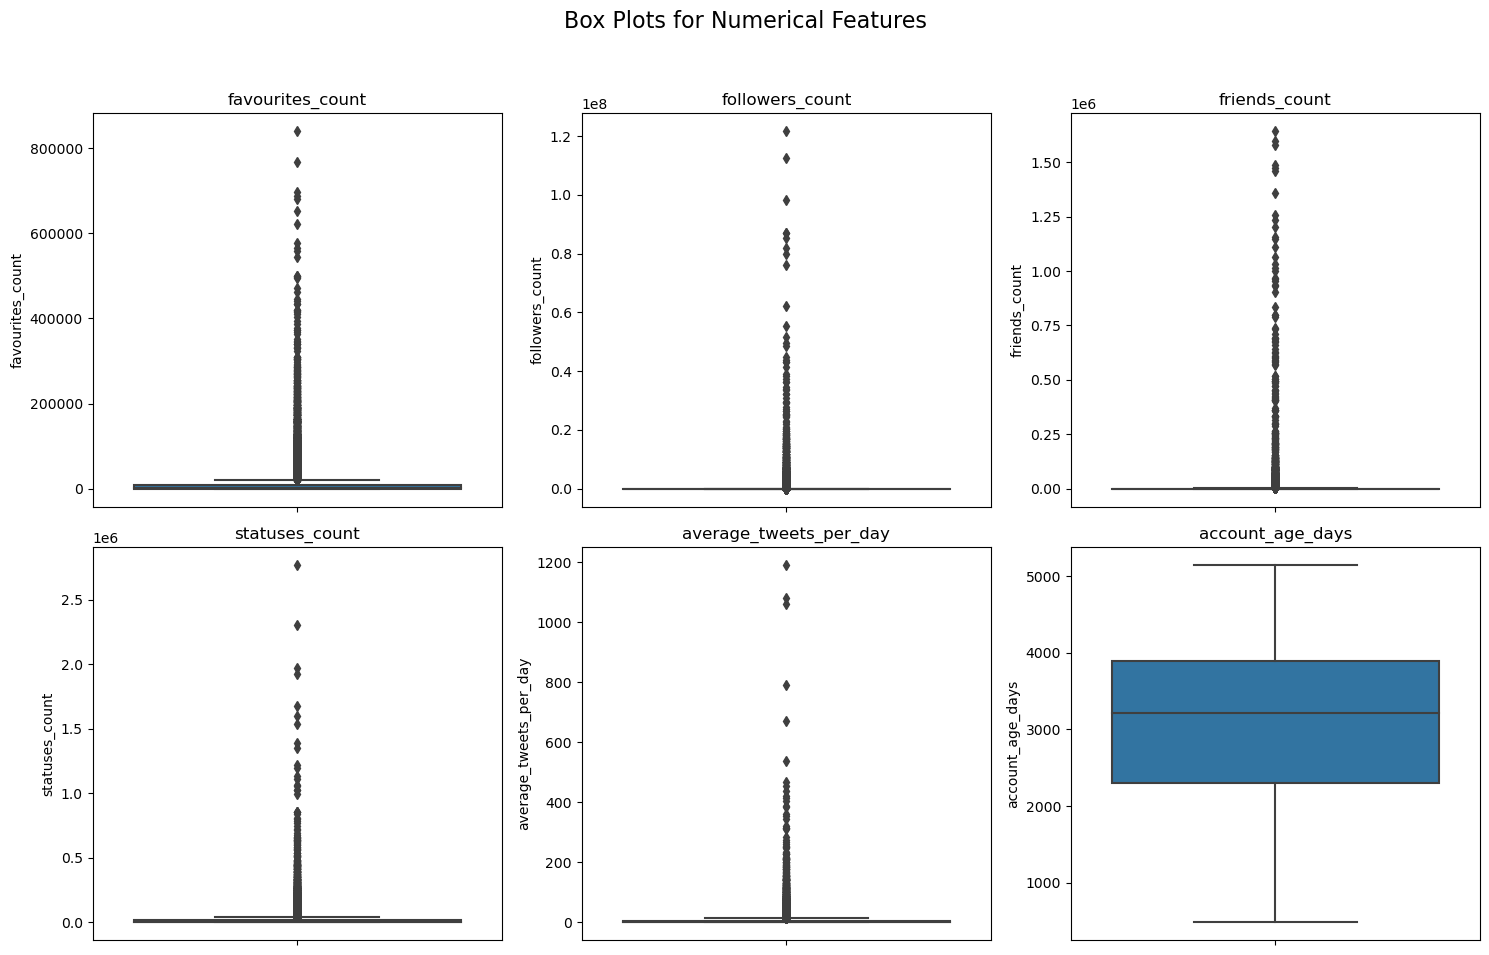

In [11]:
import matplotlib.pyplot as plt

# List of numerical columns to plot
numerical_columns = ['favourites_count', 'followers_count', 'friends_count', 'statuses_count', 'average_tweets_per_day', 'account_age_days']

# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle("Box Plots for Numerical Features", fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each feature and create a box plot in its own subplot
for i, column in enumerate(numerical_columns):
    sns.boxplot(data=df, y=column, ax=axes[i])
    axes[i].set_title(f"{column}")
    axes[i].set_ylabel(column)

# Adjust layout for better spacing between subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


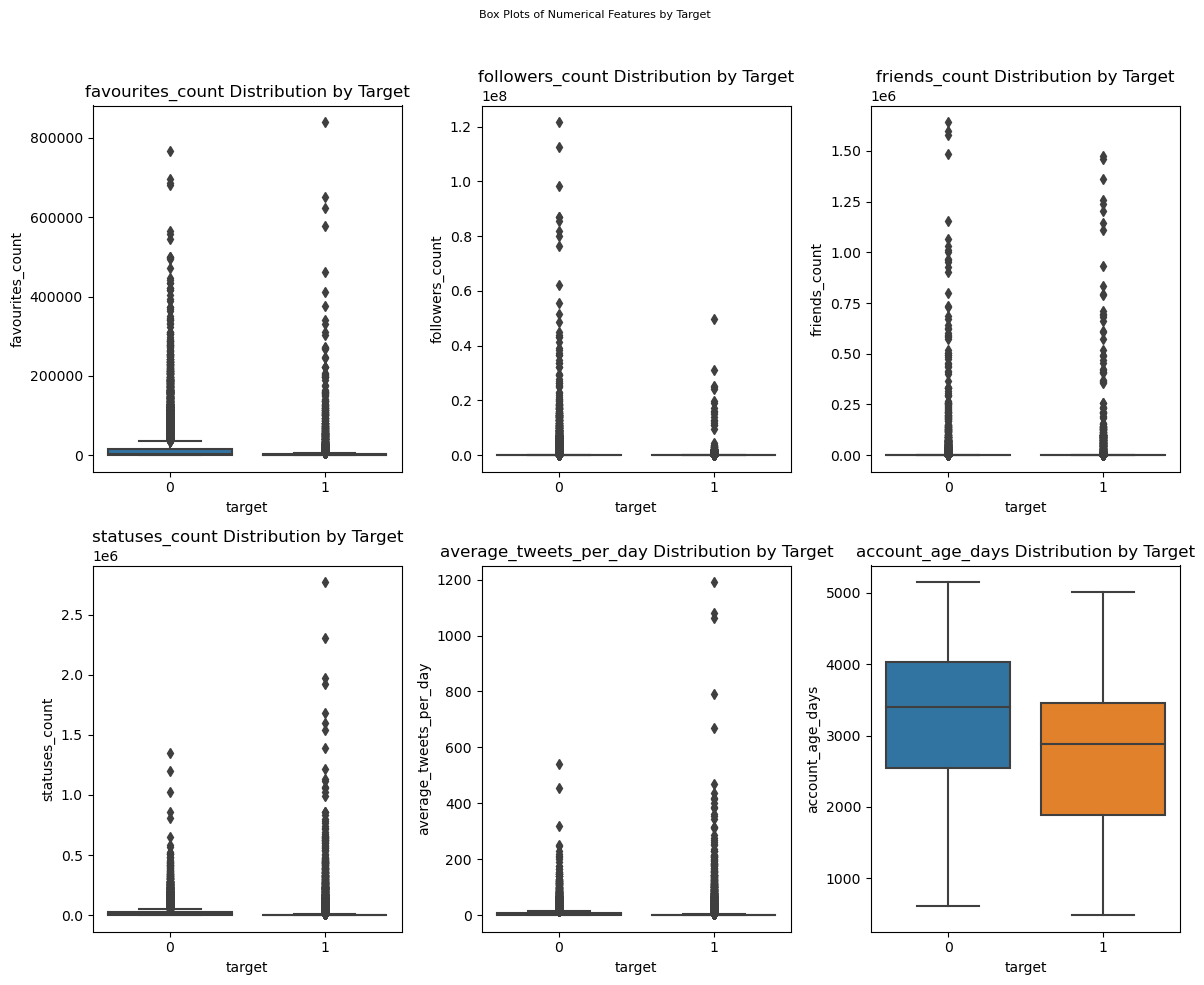

In [12]:
# # List of numerical features
# numerical_features = ['favourites_count', 'followers_count', 'friends_count', 'statuses_count', 'average_tweets_per_day', 'account_age_days']

# # Create a figure with subplots in a 2-column layout
# fig, axes = plt.subplots(nrows=(len(numerical_features) + 1) // 3, ncols=3, figsize=(12, 10))  # Adjust figsize as needed
# fig.suptitle("Box Plots of Numerical Features by Target", fontsize=8)

# # Flatten axes for easy indexing
# axes = axes.flatten()

# # Loop through each feature and create a boxplot in the respective subplot
# for i, feature in enumerate(numerical_features):
#     sns.boxplot(x='target', y=feature, data=df, ax=axes[i])
#     axes[i].set_title(f"{feature} Distribution by Target")

# # Hide any unused subplots (if the number of features is odd)
# for j in range(i + 1, len(axes)):
#     axes[j].set_visible(False)

# plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit titles and labels
# plt.show()

In [13]:
# Create binary columns indicating if there is content or "Unknown" in each column
df['has_description'] = df['description'].apply(lambda x: 0 if x == "Unknown" else 1)
df['has_profile_background_image_url'] = df['profile_background_image_url'].apply(lambda x: 0 if x == "Unknown" else 1)
df['has_lang'] = df['lang'].apply(lambda x: 0 if x == "Unknown" else 1)
df['has_location'] = df['location'].apply(lambda x: 0 if x == "Unknown" or x == "unknown" else 1)
26206-df[['has_description','has_profile_background_image_url','has_lang']].sum()

has_description                     5091
has_profile_background_image_url    3235
has_lang                            5588
dtype: int64

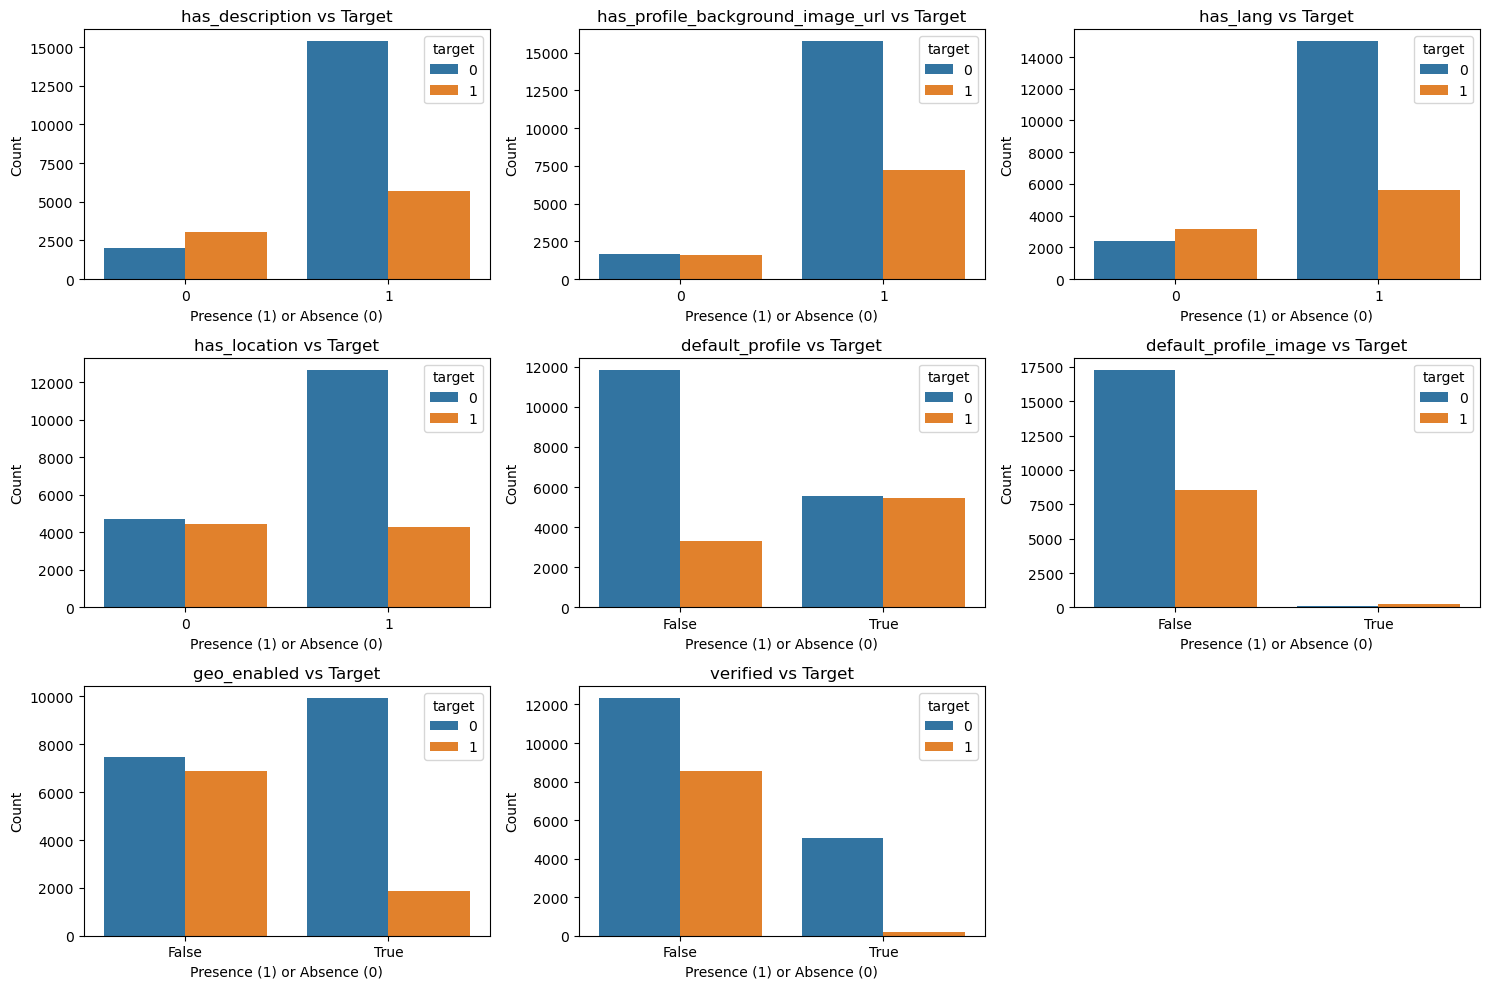

In [14]:
# # List of binary columns
# binary_columns = ['has_description', 'has_profile_background_image_url', 'has_lang', 'has_location', 
#                   'default_profile', 'default_profile_image', 'geo_enabled', 'verified']

# # Define the number of rows and columns
# n_cols = 3
# n_rows = (len(binary_columns) + n_cols - 1) // n_cols  # Calculate rows needed based on the number of columns

# # Create subplots with specified number of rows and columns
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))  # Adjust figsize as needed

# # Flatten the axes array for easy indexing
# axes = axes.flatten()

# # Plot each binary column against the target variable
# for i, column in enumerate(binary_columns):
#     sns.countplot(x=column, hue='target', data=df, ax=axes[i])
#     axes[i].set_title(f"{column} vs Target")
#     axes[i].set_xlabel("Presence (1) or Absence (0)")
#     axes[i].set_ylabel("Count")

# # Remove any empty subplots
# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])

# plt.tight_layout()
# plt.show()



In [15]:

# Reset to default after displaying (optional)
pd.reset_option('display.max_rows')

# Check the unique values in the location column
location_counts = df['location'].value_counts()
print(location_counts.head())  # Display top 20 locations


unknown            9207
Los Angeles, CA     362
New York, NY        249
United States       170
Los Angeles         160
Name: location, dtype: int64


****We see that whether these 3 fields have values do have impact on the target.****

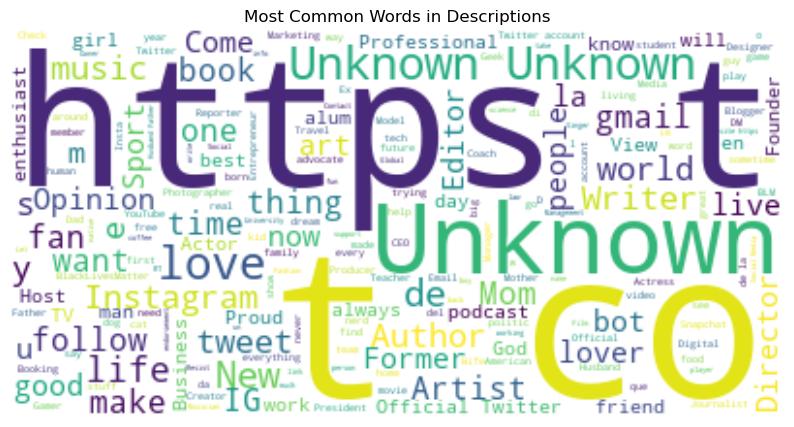

In [16]:
# from wordcloud import WordCloud

# # Combine all descriptions into a single string for visualization
# all_descriptions = " ".join(df['description'].fillna(""))

# # Generate and display a word cloud
# plt.figure(figsize=(10, 6))
# wordcloud = WordCloud(width=400, height=200, background_color="white").generate(all_descriptions)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.title("Most Common Words in Descriptions")
# plt.show()


In [17]:
df.columns

Index(['created_at', 'default_profile', 'default_profile_image', 'description',
       'favourites_count', 'followers_count', 'friends_count', 'geo_enabled',
       'id', 'lang', 'location', 'profile_background_image_url',
       'profile_image_url', 'screen_name', 'statuses_count', 'verified',
       'average_tweets_per_day', 'account_age_days', 'target',
       'has_description', 'has_profile_background_image_url', 'has_lang',
       'has_location'],
      dtype='object')

In [18]:
numerical_features

['favourites_count',
 'followers_count',
 'friends_count',
 'statuses_count',
 'average_tweets_per_day',
 'account_age_days']

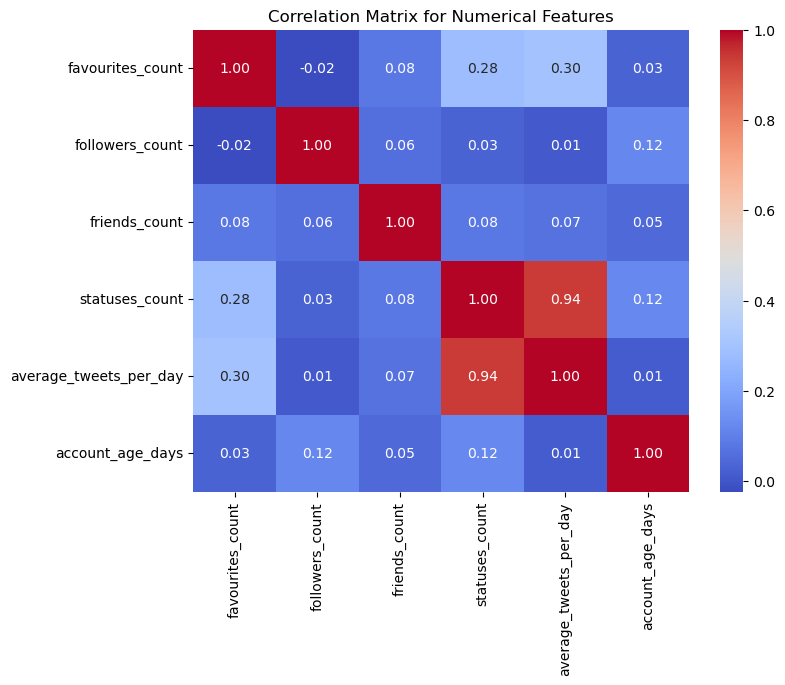

In [19]:
# # Calculate and plot the correlation matrix
# plt.figure(figsize=(8, 6))
# correlation_matrix = df[numerical_features].corr()
# sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
# plt.title("Correlation Matrix for Numerical Features")
# plt.show()


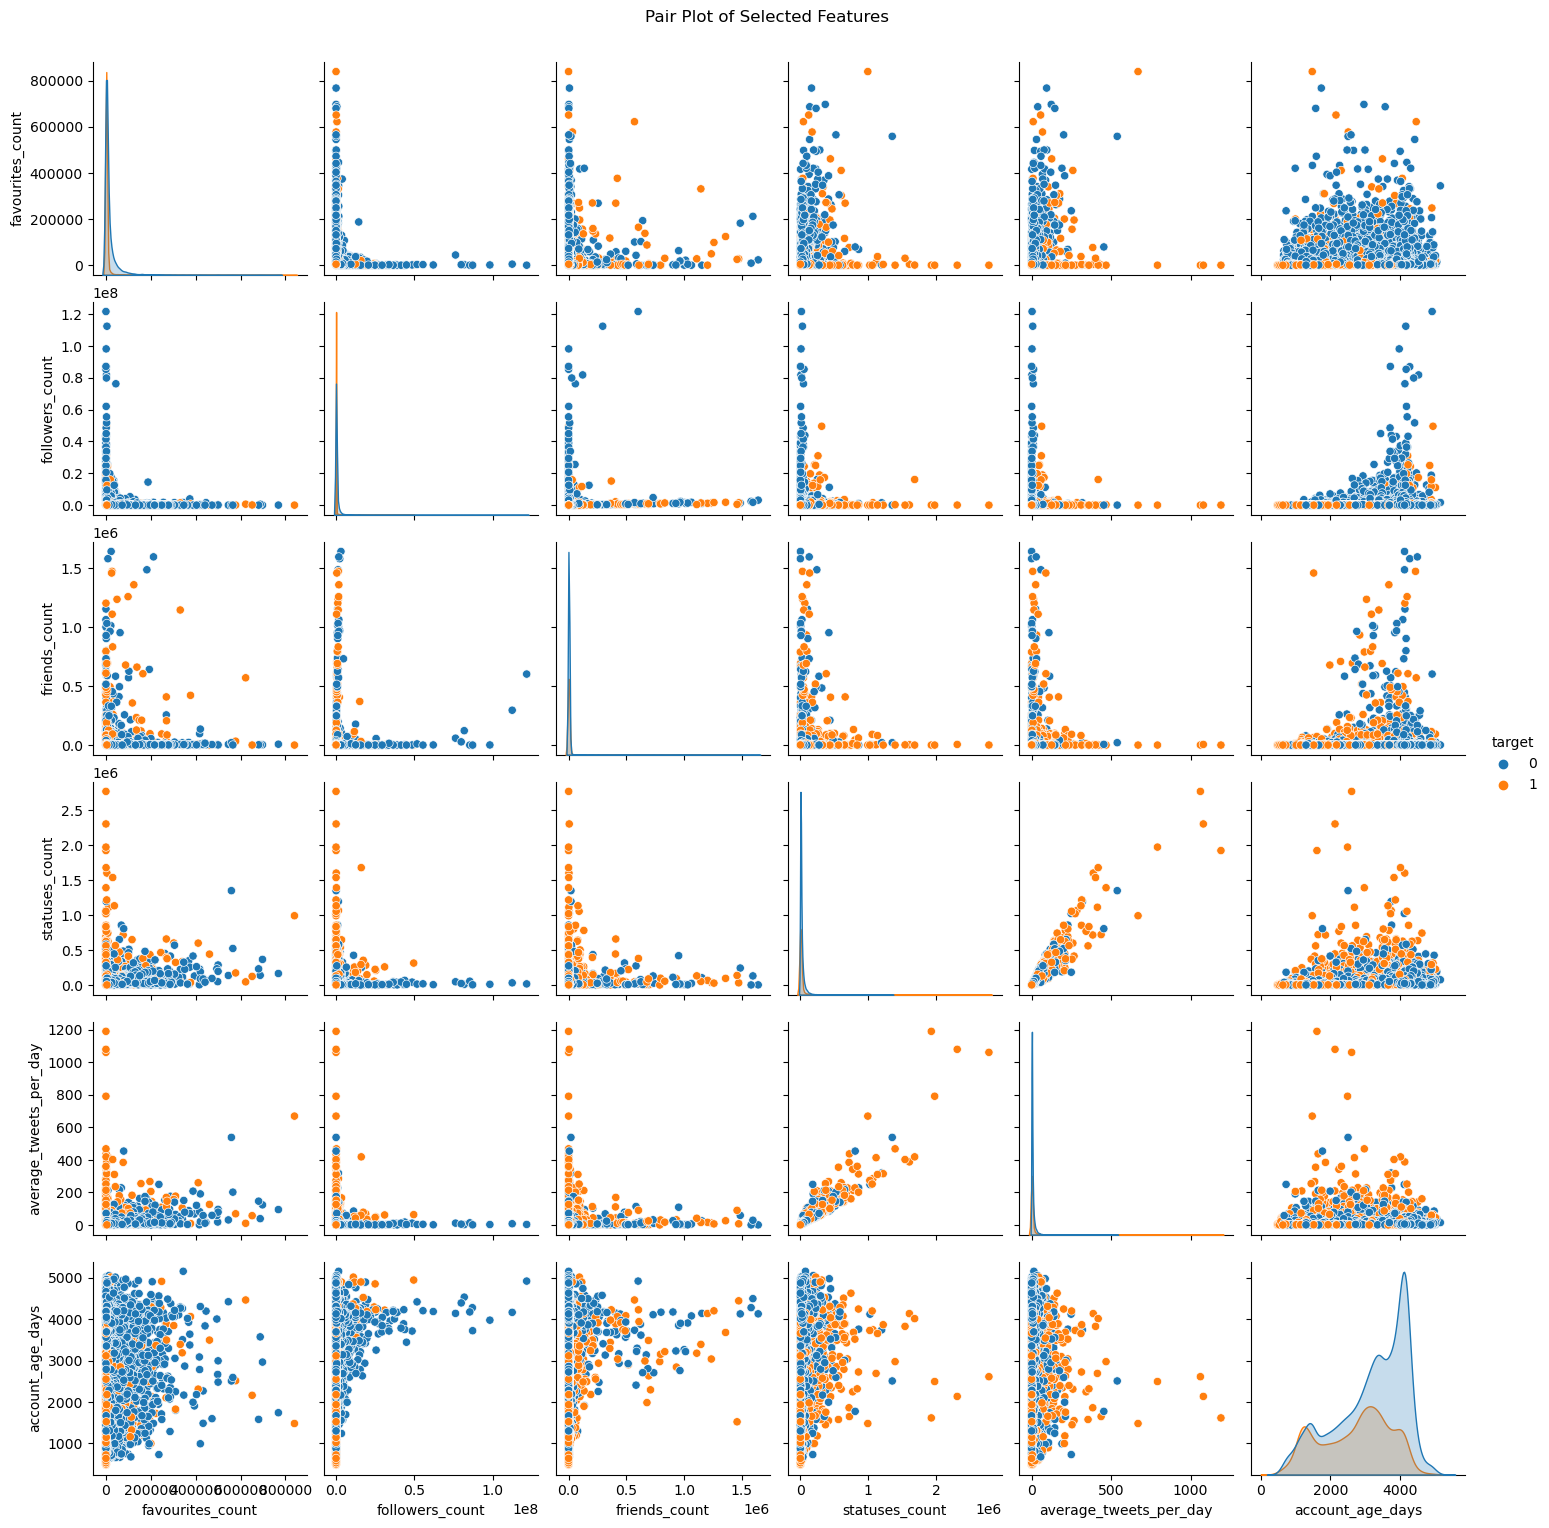

In [20]:
# # Create pair plots for a subset of features and the target
# sns.pairplot(df[['favourites_count', 'followers_count', 'friends_count', 'statuses_count', 'average_tweets_per_day', 'account_age_days', 'target']], hue="target", diag_kind="kde")
# plt.suptitle("Pair Plot of Selected Features", y=1.02)
# plt.show()


## Transform the data: dealing with outliers in numerical data

### Feature Engineering

In [21]:
# Convert to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])

# Extract temporal features
df['account_year'] = df['created_at'].dt.year
df['account_month'] = df['created_at'].dt.month
df['account_day'] = df['created_at'].dt.day
df['account_hour'] = df['created_at'].dt.hour

In [22]:
df.head()

,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,...,account_age_days,target,has_description,has_profile_background_image_url,has_lang,has_location,account_year,account_month,account_day,account_hour
0,2012-01-15 23:40:09,True,False,Cosplayer/Fitness lover. Come to me https://t....,74,7,0,False,465096524,en,...,3138,1,1,1,1,0,2012,1,15,23
1,2016-10-04 00:44:39,False,False,pobody’s nerfect,50443,164,590,True,783105517673648132,cy,...,1415,0,1,1,1,1,2016,10,4,0
2,2009-05-23 04:04:13,False,False,gracias por participar 🏅,9394,208,189,False,41970759,es,...,4106,0,1,1,1,1,2009,5,23,4
3,2009-05-17 04:31:31,False,False,Stand Up Comedian/Actor from North Philadelphi...,46,66180,1090,True,40607946,en,...,4112,0,1,1,1,1,2009,5,17,4
4,2009-02-16 13:11:21,True,False,Assignment Editor at NBC10 and President of Ja...,1223,487,867,True,20983433,en,...,4201,0,1,1,1,1,2009,2,16,13


## Data log transformation on numerical categories

In [23]:
df['favourites_count_log'] = np.log1p(df['favourites_count'])
df['followers_count_log'] = np.log1p(df['followers_count'])
df['friends_count_log'] = np.log1p(df['friends_count'])
df['statuses_count_log'] = np.log1p(df['statuses_count'])
df['average_tweets_per_day_log'] = np.log1p(df['average_tweets_per_day'])
df['account_age_days_log'] = np.log1p(df['account_age_days'])


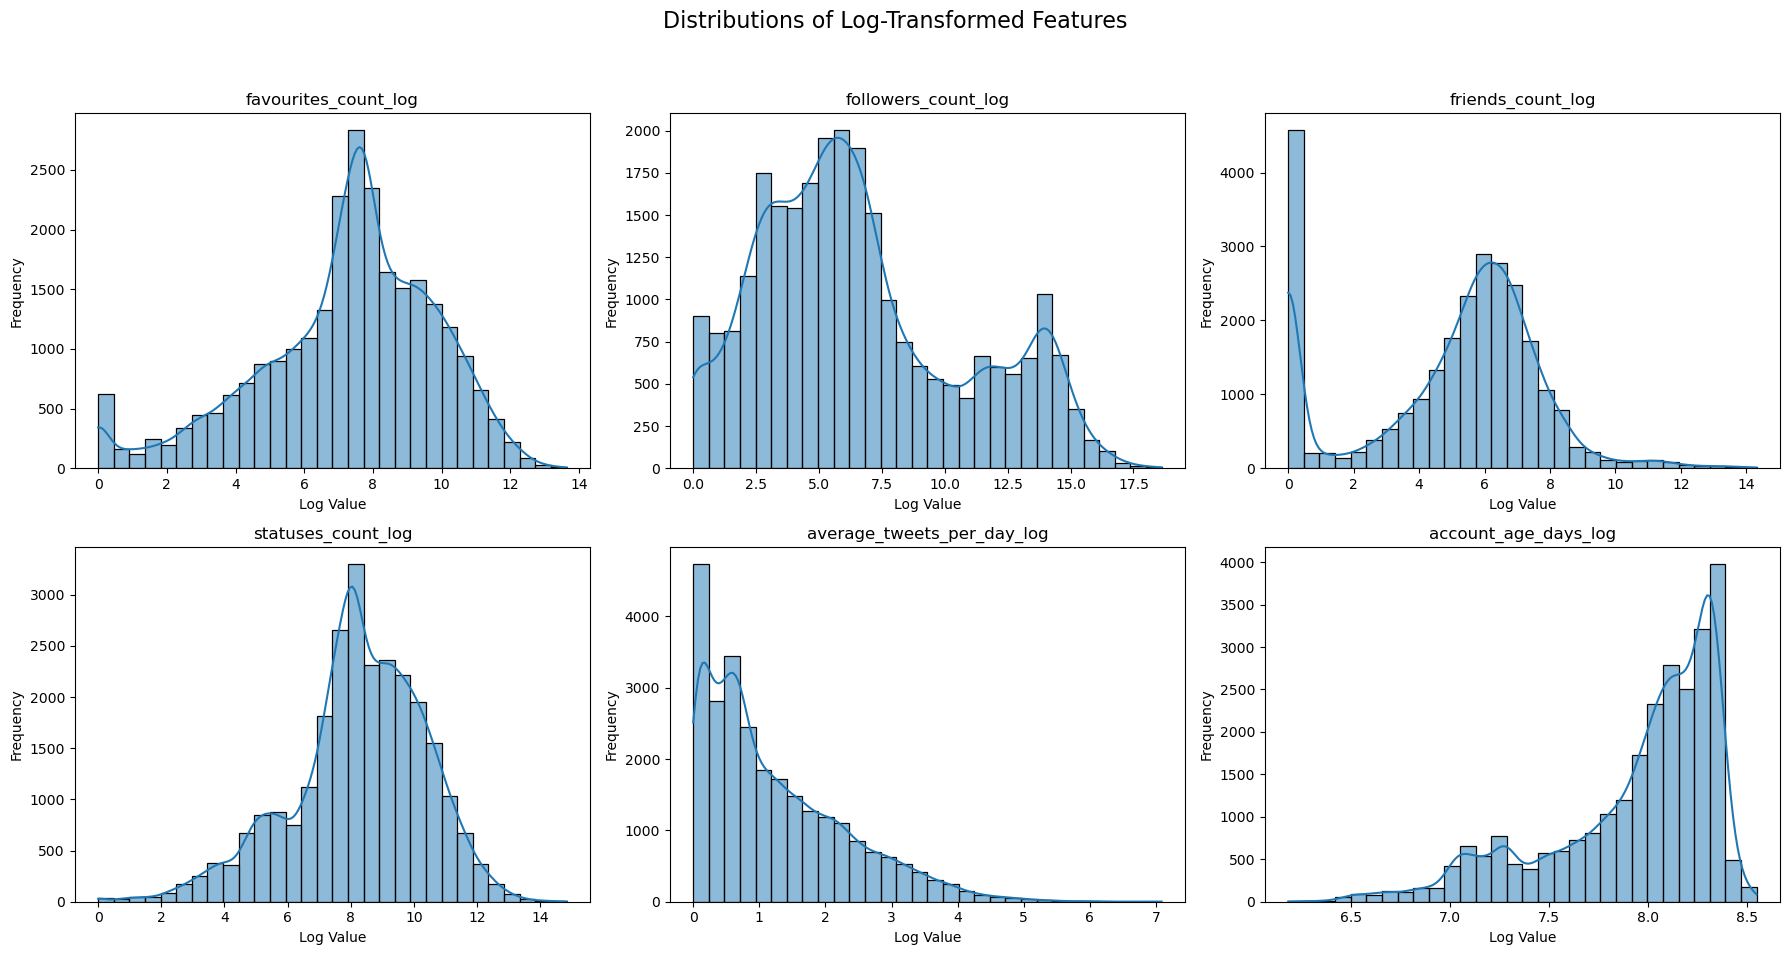

In [24]:
# # List of log-transformed features to plot
# log_transformed_features = [
#     'favourites_count_log', 
#     'followers_count_log', 
#     'friends_count_log', 
#     'statuses_count_log', 
#     'average_tweets_per_day_log', 
#     'account_age_days_log'
# ]

# # Set up the subplots - 2 rows by 3 columns
# fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
# fig.suptitle("Distributions of Log-Transformed Features", fontsize=16)

# # Flatten the axes array for easier iteration
# axes = axes.flatten()

# # Plot each log-transformed feature
# for i, feature in enumerate(log_transformed_features):
#     sns.histplot(df[feature], bins=30, kde=True, ax=axes[i])
#     axes[i].set_title(f"{feature}")
#     axes[i].set_xlabel("Log Value")
#     axes[i].set_ylabel("Frequency")

# # Adjust layout for better spacing between plots
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.show()


In [25]:
# List of columns to convert if they contain "True" and "False" as strings
binary_columns = ['default_profile', 'default_profile_image', 'geo_enabled', 'verified']

# Convert "True"/"False" to 1/0
for col in binary_columns:
    df[col] = df[col].replace({'True': 1, 'False': 0}).astype(int)


In [26]:
df.columns

Index(['created_at', 'default_profile', 'default_profile_image', 'description',
       'favourites_count', 'followers_count', 'friends_count', 'geo_enabled',
       'id', 'lang', 'location', 'profile_background_image_url',
       'profile_image_url', 'screen_name', 'statuses_count', 'verified',
       'average_tweets_per_day', 'account_age_days', 'target',
       'has_description', 'has_profile_background_image_url', 'has_lang',
       'has_location', 'account_year', 'account_month', 'account_day',
       'account_hour', 'favourites_count_log', 'followers_count_log',
       'friends_count_log', 'statuses_count_log', 'average_tweets_per_day_log',
       'account_age_days_log'],
      dtype='object')

In [27]:
# Avoid division by zero by adding a small constant
df['follower_friend_ratio'] = df['followers_count'] / (df['friends_count'] + 1)
df['like_tweet_ratio'] = df['favourites_count'] / (df['statuses_count'] + 1)

In [28]:
# Length of description
df['description_length'] = df['description'].fillna("").apply(len)

# Presence of URL in description
df['description_has_url'] = df['description'].apply(lambda x: 1 if 'http' in str(x) else 0)

# Optional: TF-IDF on description (using Scikit-learn's TfidfVectorizer)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=100)
description_tfidf = tfidf.fit_transform(df['description'].fillna("")).toarray()
tfidf_df = pd.DataFrame(description_tfidf, columns=[f'tfidf_{i}' for i in range(100)])
df = pd.concat([df, tfidf_df], axis=1)


In [29]:
import joblib
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [30]:
df.columns

Index(['created_at', 'default_profile', 'default_profile_image', 'description',
       'favourites_count', 'followers_count', 'friends_count', 'geo_enabled',
       'id', 'lang',
       ...
       'tfidf_90', 'tfidf_91', 'tfidf_92', 'tfidf_93', 'tfidf_94', 'tfidf_95',
       'tfidf_96', 'tfidf_97', 'tfidf_98', 'tfidf_99'],
      dtype='object', length=137)

In [31]:
top_locations = df['location'].value_counts().index[:20]  # Take top 20 locations
df['location'] = df['location'].apply(lambda x: x if x in top_locations else 'Other')
df = pd.get_dummies(df, columns=['location'], prefix='location')

In [32]:
location_columns = [f'location_{loc}' for loc in top_locations] + ['location_Other']


In [33]:
# Custom profile image and background indicators
df['has_custom_profile_image'] = df['profile_image_url'].apply(lambda x: 0 if 'pbs.twimg.com' in str(x) else 1)
df['has_custom_background'] = df['profile_background_image_url'].apply(lambda x: 0 if 'abs.twimg.com' in str(x) else 1)

# Customization count
df['customization_score'] = (
    df['has_custom_profile_image'] +
    df['has_custom_background'] +
    df['has_description'] +
    df['has_location']
)
# One-hot encode the language column
df = pd.get_dummies(df, columns=['lang'], prefix='lang')



In [34]:
# Save the one-hot encoded columns for `lang` to ensure consistency
lang_columns = [col for col in df.columns if col.startswith('lang_')]

In [35]:
df.columns

Index(['created_at', 'default_profile', 'default_profile_image', 'description',
       'favourites_count', 'followers_count', 'friends_count', 'geo_enabled',
       'id', 'profile_background_image_url',
       ...
       'lang_sv', 'lang_sw', 'lang_th', 'lang_tl', 'lang_tr', 'lang_uk',
       'lang_ur', 'lang_vi', 'lang_zh-cn', 'lang_zh-tw'],
      dtype='object', length=208)

In [36]:
!pip install xgboost

In [37]:
df.drop(columns=['id', 'screen_name', 'created_at', 'profile_background_image_url', 'profile_image_url'], inplace=True)


In [38]:
df.columns

Index(['default_profile', 'default_profile_image', 'description',
       'favourites_count', 'followers_count', 'friends_count', 'geo_enabled',
       'statuses_count', 'verified', 'average_tweets_per_day',
       ...
       'lang_sv', 'lang_sw', 'lang_th', 'lang_tl', 'lang_tr', 'lang_uk',
       'lang_ur', 'lang_vi', 'lang_zh-cn', 'lang_zh-tw'],
      dtype='object', length=203)

In [39]:
# Print all column names in a list format
print(df.columns.tolist())


['default_profile', 'default_profile_image', 'description', 'favourites_count', 'followers_count', 'friends_count', 'geo_enabled', 'statuses_count', 'verified', 'average_tweets_per_day', 'account_age_days', 'target', 'has_description', 'has_profile_background_image_url', 'has_lang', 'has_location', 'account_year', 'account_month', 'account_day', 'account_hour', 'favourites_count_log', 'followers_count_log', 'friends_count_log', 'statuses_count_log', 'average_tweets_per_day_log', 'account_age_days_log', 'follower_friend_ratio', 'like_tweet_ratio', 'description_length', 'description_has_url', 'tfidf_0', 'tfidf_1', 'tfidf_2', 'tfidf_3', 'tfidf_4', 'tfidf_5', 'tfidf_6', 'tfidf_7', 'tfidf_8', 'tfidf_9', 'tfidf_10', 'tfidf_11', 'tfidf_12', 'tfidf_13', 'tfidf_14', 'tfidf_15', 'tfidf_16', 'tfidf_17', 'tfidf_18', 'tfidf_19', 'tfidf_20', 'tfidf_21', 'tfidf_22', 'tfidf_23', 'tfidf_24', 'tfidf_25', 'tfidf_26', 'tfidf_27', 'tfidf_28', 'tfidf_29', 'tfidf_30', 'tfidf_31', 'tfidf_32', 'tfidf_33', 'tfi

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Assuming 'target' is the label column and 'id' is the unique identifier
X = df.drop(columns=['target','description'])  # Drop target and id columns from features
y = df['target']  # Target variable

# Split the dataset into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Define the XGBoost model
model = xgb.XGBClassifier(
    scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]),  # Handle class imbalance
    use_label_encoder=False,
    eval_metric='auc',  # Set evaluation metric for AUC-ROC
    random_state=42
)

# Train the model on the training set
model.fit(X_train, y_train)
# Perform cross-validation
auc_scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=5)
print("AUC-ROC scores from cross-validation:", auc_scores)
print("Mean AUC-ROC:", auc_scores.mean())


C:\Users\shane\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [00:27:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\shane\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [00:27:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\shane\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [00:27:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\shane\anaconda3\lib\site-packages\

AUC-ROC scores from cross-validation: [0.93420134 0.9329133  0.94657071 0.93968023 0.93700391]
Mean AUC-ROC: 0.9380738969881508


In [96]:


# Load the test dataset
test_df = pd.read_csv(r"C:\Users\shane\Desktop\MSBA\BT4012_Kaggle\bt-4012-in-class-kaggle-competition-2024-nov\test.csv")

test_df['description'].fillna("Unknown", inplace=True)
test_df['location'].fillna("Unknown", inplace=True)
test_df['lang'].fillna("Unknown", inplace=True)
test_df['profile_background_image_url'].fillna("Unknown", inplace=True)
test_df['profile_image_url'].fillna("Unknown", inplace=True)

# Create binary columns indicating if there is content or "Unknown" in each column
test_df['has_description'] = test_df['description'].apply(lambda x: 0 if x == "Unknown" else 1)
test_df['has_profile_background_image_url'] = test_df['profile_background_image_url'].apply(lambda x: 0 if x == "Unknown" else 1)
test_df['has_lang'] = test_df['lang'].apply(lambda x: 0 if x == "Unknown" else 1)
test_df['has_location'] = test_df['location'].apply(lambda x: 0 if x == "Unknown" or x == "unknown" else 1)

# Convert to datetime format
test_df['created_at'] = pd.to_datetime(test_df['created_at'])

# Extract temporal features
test_df['account_year'] = test_df['created_at'].dt.year
test_df['account_month'] = test_df['created_at'].dt.month
test_df['account_day'] = test_df['created_at'].dt.day
test_df['account_hour'] = test_df['created_at'].dt.hour

test_df['favourites_count_log'] = np.log1p(test_df['favourites_count'])
test_df['followers_count_log'] = np.log1p(test_df['followers_count'])
test_df['friends_count_log'] = np.log1p(test_df['friends_count'])
test_df['statuses_count_log'] = np.log1p(test_df['statuses_count'])
test_df['average_tweets_per_day_log'] = np.log1p(test_df['average_tweets_per_day'])
test_df['account_age_days_log'] = np.log1p(test_df['account_age_days'])
# List of columns to convert if they contain "True" and "False" as strings
binary_columns = ['default_profile', 'default_profile_image', 'geo_enabled', 'verified']

# Convert "True"/"False" to 1/0
for col in binary_columns:
    test_df[col] = test_df[col].replace({'True': 1, 'False': 0}).astype(int)
# Avoid division by zero by adding a small constant
test_df['follower_friend_ratio'] = test_df['followers_count'] / (test_df['friends_count'] + 1)
test_df['like_tweet_ratio'] = test_df['favourites_count'] / (test_df['statuses_count'] + 1)
# Length of description
test_df['description_length'] = test_df['description'].fillna("").apply(len)

# Presence of URL in description
test_df['description_has_url'] = test_df['description'].apply(lambda x: 1 if 'http' in str(x) else 0)

# Replace locations outside the top 20 with "Other" in the test data
test_df['location'] = test_df['location'].apply(lambda x: x if x in top_locations else 'Other')

# One-hot encode the `location` column in the test data
test_df = pd.get_dummies(test_df, columns=['location'], prefix='location')

# Ensure the test data has the same columns as the training data for locations
for col in location_columns:
    if col not in test_df.columns:
        test_df[col] = 0  # Add missing columns and fill with 0

# Reorder columns in test_df to match the training data's order
test_df = test_df[location_columns + [col for col in test_df.columns if col not in location_columns]]


# Custom profile image and background indicators
test_df['has_custom_profile_image'] = test_df['profile_image_url'].apply(lambda x: 0 if 'pbs.twimg.com' in str(x) else 1)
test_df['has_custom_background'] = test_df['profile_background_image_url'].apply(lambda x: 0 if 'abs.twimg.com' in str(x) else 1)

# Customization count
test_df['customization_score'] = (
    test_df['has_custom_profile_image'] +
    test_df['has_custom_background'] +
    test_df['has_description'] +
    test_df['has_location']
)
# Load the saved TF-IDF vectorizer
tfidf = joblib.load('tfidf_vectorizer.pkl')

# Transform test descriptions using the fitted TF-IDF vectorizer
test_tfidf = tfidf.transform(test_df['description'].fillna("")).toarray()

# Convert to DataFrame and add to test DataFrame
tfidf_df = pd.DataFrame(test_tfidf, columns=[f'tfidf_{i}' for i in range(test_tfidf.shape[1])])
test_df = pd.concat([test_df.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)

test_df = pd.get_dummies(test_df, columns=['lang'], prefix='lang')

# Add any missing columns in test_df that are in training data but not in test data
for col in lang_columns:
    if col not in test_df.columns:
        test_df[col] = 0  # Fill missing columns with 0s

# Ensure test_df has only the same columns as training by reordering
test_df = test_df[lang_columns + [col for col in test_df.columns if col not in lang_columns]]

# Drop 'id' or other columns not used for prediction (if not part of the original training dataset features)
test_df = test_df.drop(columns=['id'], errors='ignore')


In [97]:
test_df.drop(columns=['screen_name', 'created_at', 'profile_background_image_url', 'profile_image_url','description','index'], inplace=True)
train_columns = X.columns
test_columns = test_df.columns
test_df = test_df[train_columns]


In [79]:
y_prob = model.predict_proba(test_df)[:, 1]  # Probability of being a bot (target=1)
# Create the submission DataFrame
submission = pd.DataFrame({
    'index': test_df.index,  # Ensure 'index' column aligns with the original row indices
    'target': y_prob         # Predicted probability for target=1
})

# Save to CSV
submission.to_csv("submission.csv", index=False)


In [68]:
X.columns

Index(['default_profile', 'default_profile_image', 'favourites_count',
       'followers_count', 'friends_count', 'geo_enabled', 'statuses_count',
       'verified', 'average_tweets_per_day', 'account_age_days',
       ...
       'lang_sv', 'lang_sw', 'lang_th', 'lang_tl', 'lang_tr', 'lang_uk',
       'lang_ur', 'lang_vi', 'lang_zh-cn', 'lang_zh-tw'],
      dtype='object', length=201)

In [80]:
import os
os.getcwd()


'C:\\Users\\shane\\Downloads'

In [72]:
# Get columns in train and test
train_columns = set(X.columns)
test_columns = set(test_df.columns)

# Columns in train but not in test
train_only = train_columns - test_columns
print("Columns in train but not in test:", train_only)

# Columns in test but not in train
test_only = test_columns - train_columns
print("Columns in test but not in train:", test_only)


Columns in train but not in test: set()
Columns in test but not in train: set()


In [81]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [1, 2, 5]  # Adjust for class imbalance if present
}

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='auc')

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_grid, 
                                   scoring='roc_auc', n_iter=20, cv=3, random_state=42, n_jobs=-1, verbose=1)
random_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", random_search.best_params_)
print("Best AUC score:", random_search.best_score_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


C:\Users\shane\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [01:03:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: {'subsample': 0.8, 'scale_pos_weight': 5, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Best AUC score: 0.9425758749342427


In [98]:
# Generate predictions and save to submission
best_model = random_search.best_estimator_  # or choose the best model based on AUC scores
y_prob = best_model.predict_proba(test_df)[:, 1]  # Probability for target=1

submission = pd.DataFrame({
    'index': test_df.index,
    'target': y_prob
})
submission.to_csv("submission.csv", index=False)


In [93]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Define a reduced parameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],  # Lowering the range of max_depth
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],  # Reduced options for subsample
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 5],
    'gamma': [0, 0.1],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 1.5]
}

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='auc')

# Randomized Search with a limited number of iterations
random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_dist,
    n_iter=100,  # Sample 100 random parameter combinations
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,  # Use all available cores
    verbose=1,
    random_state=42
)

# Fit the randomized search model
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best AUC score:", random_search.best_score_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\shane\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [01:18:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: {'subsample': 0.7, 'reg_lambda': 1.5, 'reg_alpha': 0, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.8}
Best AUC score: 0.9432139636567896


In [99]:
# Generate predictions and save to submission
best_model = random_search.best_estimator_  # or choose the best model based on AUC scores
y_prob = best_model.predict_proba(test_df)[:, 1]  # Probability for target=1

submission = pd.DataFrame({
    'index': test_df.index,
    'target': y_prob
})
submission.to_csv("submission.csv", index=False)


In [86]:
!pip install lightgbm

     ---------------------------------------- 1.4/1.4 MB 22.8 MB/s eta 0:00:00


In [91]:
# Replace special characters in column names of both train and test sets
X_train.columns = df.columns.str.replace(r'[^\w\s]', '_', regex=True)  # Replace non-alphanumeric characters with '_'
X_train.columns = df.columns.str.replace(' ', '_')  # Replace spaces with '_'

# test_df.columns = test_df.columns.str.replace(r'[^\w\s]', '_', regex=True)
# test_df.columns = test_df.columns.str.replace(' ', '_')


ValueError: Length mismatch: Expected axis has 201 elements, new values have 203 elements

In [89]:
import lightgbm as lgb

# Define LightGBM model with some base parameters
lgb_model = lgb.LGBMClassifier(objective='binary', random_state=42)

# Perform hyperparameter tuning if desired (similar to XGBoost example)
lgb_model.fit(X_train, y_train)

# Predict probabilities for evaluation
y_prob_lgb = lgb_model.predict_proba(X_test)[:, 1]
print("AUC score for LightGBM:", roc_auc_score(y_test, y_prob_lgb))


LightGBMError: Do not support special JSON characters in feature name.